Цель работы заключается в изучении рынка российского кинопроката и выявить складывающихся в нем тенденций. Для анализа использованы данные о прокатных удостоверениях, сборах и государственной поддержке фильмов, опубликованные на портале Министерства культуры, а также информацию с сайта КиноПоиск.

# Исследование данных о российском кинопрокате



### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

#### Импортируем необходимые библиотеки

In [1]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import missingno as msno

#### Откроем файлы с данными и выведем первые 10 строк и информацию о данных.

In [3]:
movies = pd.read_csv('/datasets/mkrf_movies.csv')
shows = pd.read_csv('/datasets/mkrf_shows.csv')

In [4]:
movies.head(10)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
5,Остановился поезд,111013816,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма
6,Любовь и голуби,111007013,2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия"
7,Любовь и сигареты,221074614,2014-12-29T12:00:00.000Z,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия"
8,Отпетые мошенники.,121011416,2016-05-05T12:00:00.000Z,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал"
9,Отпуск за свой счет,111019114,2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия"


In [5]:
shows.head(10)

,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08
5,111000119,4.293650e+06
6,111000212,2.000000e+02
7,111000216,3.555670e+05
8,111000313,7.100000e+02
9,111000314,1.607970e+06


In [6]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [7]:
shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


Объединение данных возмлжно по столбцу puNumber. При этом необходимо учитывать, что в первой таблице этот столбец имеет тип значений object, поэтому необходимо привести его к численному виду

In [8]:
movies['puNumber'] = pd.to_numeric(movies['puNumber'], errors = 'coerce')

In [9]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7485 non-null   float64
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [10]:
shows['puNumber'] = shows['puNumber'].astype('float32')

#### Проведем слияние датасетов в объединенный датасет с наименование data.

In [11]:
data = movies.merge(shows, on='puNumber', how='left')

In [12]:
data.head(10)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915.0,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716.0,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416.0,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916.0,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815.0,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
5,Остановился поезд,111013816.0,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма,4808.0
6,Остановился поезд,111013816.0,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма,547720.0
7,Любовь и голуби,111007013.0,2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия",NaN
8,Любовь и сигареты,221074614.0,2014-12-29T12:00:00.000Z,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия",NaN
9,Отпетые мошенники.,121011416.0,2016-05-05T12:00:00.000Z,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал",550.0


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8813 entries, 0 to 8812
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  8813 non-null   object 
 1   puNumber               8812 non-null   float64
 2   show_start_date        8813 non-null   object 
 3   type                   8813 non-null   object 
 4   film_studio            8795 non-null   object 
 5   production_country     8808 non-null   object 
 6   director               8803 non-null   object 
 7   producer               8175 non-null   object 
 8   age_restriction        8813 non-null   object 
 9   refundable_support     407 non-null    float64
 10  nonrefundable_support  407 non-null    float64
 11  budget                 407 non-null    float64
 12  financing_source       407 non-null    object 
 13  ratings                7755 non-null   object 
 14  genres                 7744 non-null   object 
 15  box_

По оценке информации видно, что в общий датасет добавлен столбец со сборами фильмов, теперь в датасете 15 столбцов.

Проведено открытие двух файлов, получена информация о данных, содержащихся в них. Проведено слияние двух датасетов в один по столбцу с номером прокатного удостоверения.

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

Преобразуем тип времени исключив указания о часах и минутах старта проката (так как везде равна 00 - 00).

In [14]:
data['show_start_date'] = pd.to_datetime(data['show_start_date']).dt.date
data['show_start_date'] = pd.to_datetime(data['show_start_date'], format='%Y-%m-%d')


In [15]:
data.head(5)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915.0,2015-11-27,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716.0,2016-09-13,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416.0,2016-10-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916.0,2016-06-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815.0,2015-07-29,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


Приведем наименование столбца puNumber к принятому в Python виду.

In [16]:
data = data.rename( 
 columns={ 
'puNumber': 'pu_number' 
 } 
)


In [17]:
data.head(5)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915.0,2015-11-27,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716.0,2016-09-13,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416.0,2016-10-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916.0,2016-06-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815.0,2015-07-29,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8813 entries, 0 to 8812
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  8813 non-null   object        
 1   pu_number              8812 non-null   float64       
 2   show_start_date        8813 non-null   datetime64[ns]
 3   type                   8813 non-null   object        
 4   film_studio            8795 non-null   object        
 5   production_country     8808 non-null   object        
 6   director               8803 non-null   object        
 7   producer               8175 non-null   object        
 8   age_restriction        8813 non-null   object        
 9   refundable_support     407 non-null    float64       
 10  nonrefundable_support  407 non-null    float64       
 11  budget                 407 non-null    float64       
 12  financing_source       407 non-null    object        
 13  rat

В столбцe ratings нужно поменять тип на числовой. Замену сделаем позже, когда разберемся с пропущенными значениями.

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

In [19]:
data.isna().sum()

title                       0
pu_number                   1
show_start_date             0
type                        0
film_studio                18
production_country          5
director                   10
producer                  638
age_restriction             0
refundable_support       8406
nonrefundable_support    8406
budget                   8406
financing_source         8406
ratings                  1058
genres                   1069
box_office               6904
dtype: int64

In [20]:
data.isna().mean()

title                    0.000000
pu_number                0.000113
show_start_date          0.000000
type                     0.000000
film_studio              0.002042
production_country       0.000567
director                 0.001135
producer                 0.072393
age_restriction          0.000000
refundable_support       0.953818
nonrefundable_support    0.953818
budget                   0.953818
financing_source         0.953818
ratings                  0.120050
genres                   0.121298
box_office               0.783388
dtype: float64

<AxesSubplot:>

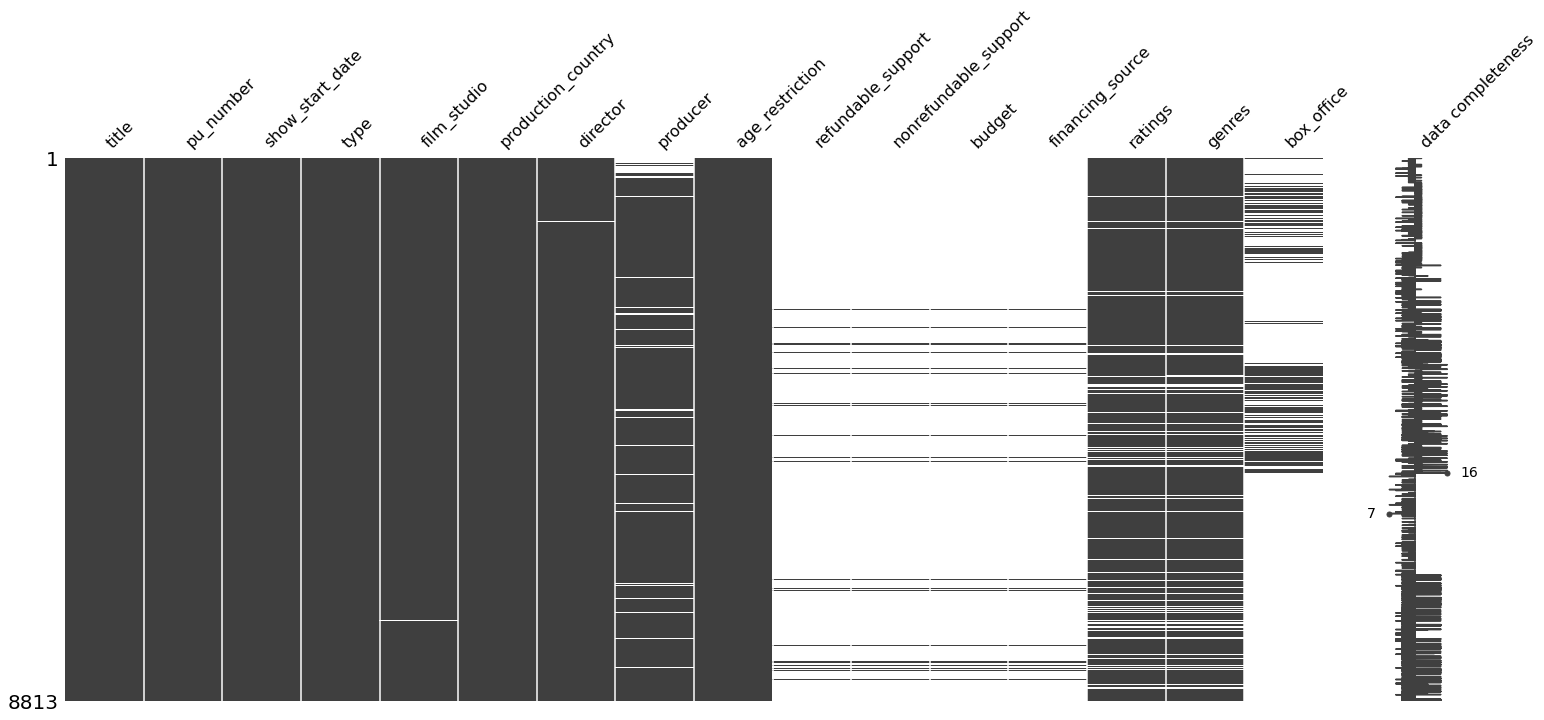

In [23]:
msno.matrix(data, labels=True)

<AxesSubplot:>

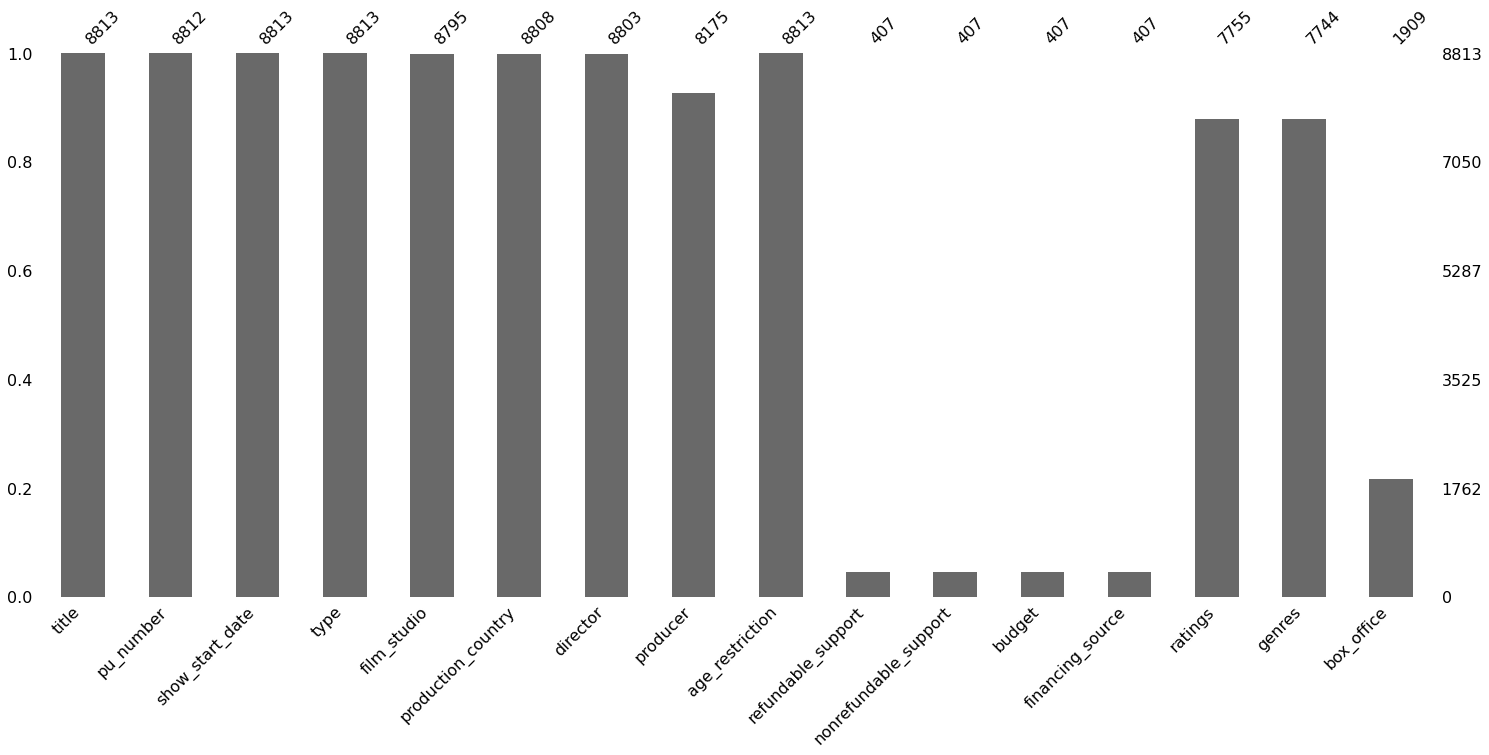

In [22]:
msno.bar(data)

<AxesSubplot:>

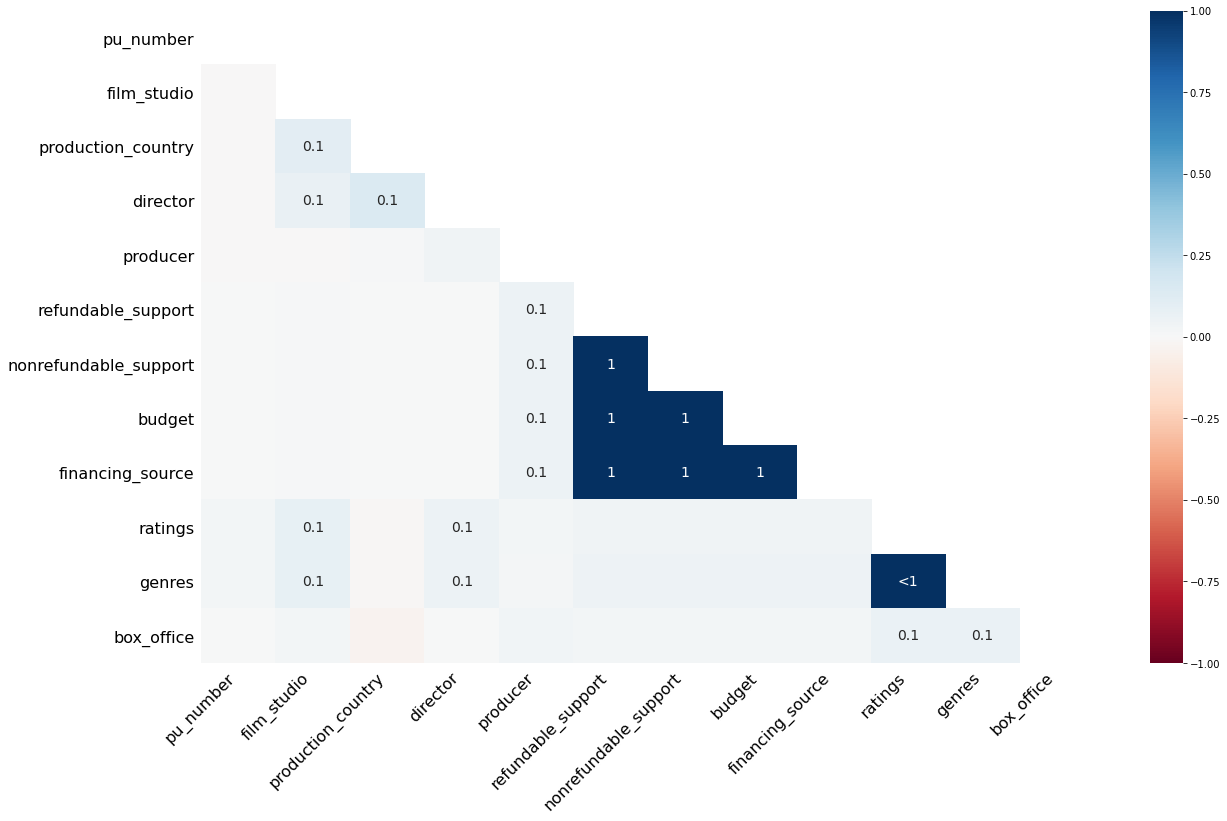

In [24]:
msno.heatmap(data)

В столбцах:
refundable_support, nonrefundable_support, budget, financing_source 96% данных пропущенно
box_office пропущено 58% данных
ratings и genres пропущено 13% данных
producer пропущено 0,8% данных
1 пропущенное значение в столбце pu_number

Заменим единственное пропущенное значение в номерах прокатного удостоверения на 0:

In [55]:
data['pu_number'] = data['pu_number'].fillna(0)

Проверим столбец с наименованием студии.

In [56]:
data.loc[data['film_studio'].isna() == True]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1758,Stars in Shorts,121011114.0,2014-06-03,Художественный,NaN,"США, Великобритания","Роберт Фестингер, Руперт Френд, Джей Камен, Ни...","Татьяна Келли, Роберта Мунро, Руперт Френд, До...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.3,комедия,NaN
5768,Мульт личности. Выпуск 5,214000410.0,2010-01-25,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.0,"мультфильм,комедия",NaN
7432,Значит любит,111013818.0,2018-08-10,Художественный,NaN,Россия,А.Краевский,Е.Щербакова,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7508,Несейка. Младшая дочь,112007018.0,2018-09-01,Документальный,NaN,Россия,В.Марин,"Д.Якунин, Ф.Абрютин, О.Филонова",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7706,Ян Антонышев,112011818.0,2018-11-15,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7707,Ян Антонышев,112011918.0,2018-11-15,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7726,Доживем до каникул?..,111021918.0,2018-11-15,Художественный,NaN,Россия,Я.Хальпукова (псевдоним Яна Мартынец),Я.Хальпукова (псевдоним Яна Мартынец),«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7812,До и После,112014418.0,2018-12-05,Документальный,NaN,Россия,А.Новокреповская,А.Новокреповская,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.9,"драма,криминал,детектив",NaN
7821,Калмыцкий геше Нгаванг Вангьял,113002018.0,2018-12-05,Научно-популярный,NaN,Россия,И.Долгина,И.Долгина,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7824,Мой папа Чингисхан,112014918.0,2018-12-06,Документальный,NaN,Россия,А.Сайфуллина,А.Сайфуллина,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Оставим данные без изменения, так как возможно данные фильмы были сняты без привлечения студий.

Проверим столбец со страной производства.

In [57]:
data.loc[data['production_country'].isna() == True]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4065,"Детский юмористический киножурнал ""Ералаш. Ну ...",111001216.0,2016-02-09,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.2,"детский,комедия",30715.00
4066,"Детский юмористический киножурнал ""Ералаш. Ну ...",111001216.0,2016-02-09,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.2,"детский,комедия",11663188.00
4067,"Детский юмористический киножурнал ""Ералаш. Ну ...",111001216.0,2016-02-09,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.2,"детский,комедия",194527.00
4068,"Детский юмористический киножурнал ""Ералаш. Ну ...",111001216.0,2016-02-09,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.2,"детский,комедия",22154071.04
5768,Мульт личности. Выпуск 5,214000410.0,2010-01-25,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.0,"мультфильм,комедия",NaN


Видим, что по названию фильмов можно определить, что они сняты в России, поэтому заменим пропуски на страну - Россия.

In [58]:
data.loc[data['production_country'].isna() == True, 'production_country'] = 'Россия'

Заменим пропуски в столбцах режиссер, продюсер, жанр на неизвестно.

In [59]:
list_1=['director', 'producer', 'genres']
for i in list_1:
    data[i]=data[i].fillna('неизвестно')

In [60]:
# Изменим тип данных столбца ratings:
data['ratings']=pd.to_numeric(data['ratings'],errors='coerce')

Считаю, что пропуски в столбце рейтинга надо оставить без изменений, так как их заполнение нулевыми показателями или средними не корректны.

In [61]:
data.isna().sum()

title                       0
pu_number                   0
show_start_date             0
type                        0
film_studio                18
production_country          0
director                    0
producer                    0
age_restriction             0
refundable_support       8406
nonrefundable_support    8406
budget                   8406
financing_source         8406
ratings                  1089
genres                      0
box_office               6904
dtype: int64

Пропуски в данных по помощи в производстве, бюджету и источнику финансирования также необходимо оставить без изменений.

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

In [62]:
data.duplicated().sum()


1

Явных дубликатов не выявлено, поэтому поищем неявные дубликаты. Скорее всего они присутствуют в номерах прокатных удостоверений, так как они должны быть уникальными.

In [63]:
data['pu_number'].duplicated().sum()

1329

In [64]:
data['pu_number'] = data['pu_number'].astype('int')

In [65]:
data[data.duplicated(subset=['pu_number'], keep = False)]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
5,Остановился поезд,111013816,2016-09-13,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,неизвестно,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма,4808.0
6,Остановился поезд,111013816,2016-09-13,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,неизвестно,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма,547720.0
9,Отпетые мошенники.,121011416,2016-05-05,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал",550.0
10,Отпетые мошенники.,121011416,2016-05-05,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал",94000864.1
11,Отпетые мошенники.,121011416,2016-05-05,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал",614126089.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5113,Охотники,111017816,2016-02-06,Художественный,Селиверстов Александр Александрович,Россия,А.Селиверстов,"Е.Тарковская, Т.Лагода, Д.Степанян",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,"фантастика,комедия,боевик",6980940.0
5965,Как жениться и остаться холостым,221154310,2010-12-17,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.0,"мелодрама,комедия",NaN
5966,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"драма,мелодрама,история",NaN
6394,Анализируй это!,221054410,2010-05-25,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.4,"комедия,криминал",NaN


Исходя из анализа можно предположить, что это разные фильмы, так имеют разные страны производства, ограничения по возрасту и рейтинг. Поэтому присвоим одному из пары новый номер удостоверения.

In [66]:
data.loc[((data['pu_number'] == 221154310) & (data['title'] == 'Как жениться и остаться холостым')), 'pu_number'] = 111111111


In [67]:
data.loc[((data['pu_number'] == 221054410) & (data['title'] == 'Анализируй то!')),'pu_number'] = 222222222

In [68]:
data['pu_number'].duplicated().sum()

1327

Проверим значения в столбце рейтинга.

In [69]:
data['ratings'].unique()

array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
       6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, nan, 8.2, 7.5, 6.7, 7.9, 5.9,
       6.2, 5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4,
       4.4, 4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6, 4.2,
       5.2, 4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 3.7, 1.4, 3.1, 3.5, 3.2, 2.8,
       1.5, 2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 1. , 1.3, 1.9, 1.8, 1.2, 1.7,
       9. , 8.9, 9.1])

Значения можно оставить без изменений.

#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

Посмотрим уникальные значения столбца с типом фильма.

In [70]:
data['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)


Удалим из столбца type лишние пробелы, которые встречаются в начале и в конце строки:

In [71]:
data['type'] = data['type'].str.strip()

Приведем к нижнему регистру.

In [72]:
data['type'] = data['type'].str.lower()

Проведем данные операции для столбцов студии производства и страной производства.

In [73]:
data['film_studio'].unique()

array(['Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикчерз, Тиг Продакшнз',
       'Киностудия "Мосфильм"',
       'Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз',
       ...,
       'Дэниел Гродник Продакшнз, Вандерфилм Медиа Корпорэйшн, Импринт Интертейнмент, Вор Хорс Интертейнмент, Пимиента ',
       'Никелодеон Анимейшн Студиос, Спин Мастер',
       'Анимаккорд Лтд., ООО Студия "АНИМАККОРД"'], dtype=object)

In [74]:
data['film_studio'] = data['film_studio'].str.lower()

In [75]:
data['production_country'].unique()

array(['США', 'СССР', 'Франция', 'СССР, Венгрия',
       'Германия-Великобритания', 'Великобритания - Италия',
       'Чехословакия', 'США - Франция - Турция', 'Новая Зеландия',
       'Канада - Франция - Испания', 'США-Германия',
       'США - Великобритания', 'Великобритания', 'США - Германия',
       'Франция - Мексика - США', 'Россия, Казахстан, США',
       'СССР, Швеция', 'СССР, Франция, Англия, Куба, ГДР', 'Германия',
       'Великобритания-США-Германия-КНР',
       'СССР, ЧССР, Западный Берлин, ПНР', 'СССР, Италия', 'Гонконг, КНР',
       'США - Франция', 'США - Япония - Франция - Великобритания',
       'Гонконг - Сингапур - Таиланд - Великобритания', 'США-Канада',
       'Франция - Италия - Великобритания - США', 'Франция - США',
       'Ирландия-Великобритания-Германия', 'Чехия', 'США-Австралия',
       'СССР, Финляндия', 'США-Франция-Великобритания-Австрия',
       'США - Бельгия', 'США - Ирландия - Великобритания',
       'Великобритания - США',
       'Люксембург - Нидерл

Удалим пробелы внутри строк и сделаем перечисление через запятую.

In [76]:
data['production_country'] = data['production_country'].replace(' ', '', regex=True)

In [77]:
data['production_country'] = data['production_country'].replace('-', ',', regex=True)

In [78]:
data['production_country'].unique()

array(['США', 'СССР', 'Франция', 'СССР,Венгрия',
       'Германия,Великобритания', 'Великобритания,Италия', 'Чехословакия',
       'США,Франция,Турция', 'НоваяЗеландия', 'Канада,Франция,Испания',
       'США,Германия', 'США,Великобритания', 'Великобритания',
       'Франция,Мексика,США', 'Россия,Казахстан,США', 'СССР,Швеция',
       'СССР,Франция,Англия,Куба,ГДР', 'Германия',
       'Великобритания,США,Германия,КНР', 'СССР,ЧССР,ЗападныйБерлин,ПНР',
       'СССР,Италия', 'Гонконг,КНР', 'США,Франция',
       'США,Япония,Франция,Великобритания',
       'Гонконг,Сингапур,Таиланд,Великобритания', 'США,Канада',
       'Франция,Италия,Великобритания,США', 'Франция,США',
       'Ирландия,Великобритания,Германия', 'Чехия', 'США,Австралия',
       'СССР,Финляндия', 'США,Франция,Великобритания,Австрия',
       'США,Бельгия', 'США,Ирландия,Великобритания', 'Великобритания,США',
       'Люксембург,Нидерланды,Испания,Великобритания,США,Италия',
       'Великобритания,Франция,США', 'НоваяЗеландия,США

In [79]:
data.head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27,художественный,"тачстоун пикчерз, кобальт пикчерз, бикон пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13,художественный,"киностудия ""мосфильм""",СССР,Е.Матвеев,неизвестно,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


Некоторые значения в категориальных переменных хранятся как списки - несколько стран, режиссеров, студий, жанров и т.д. Решением данной пролемы станет выделение первых значений из этих списков. Почти во всех категориальных столбцах есть повторяющиеся значения, но это не дубликаты. Просто фильмы могут выпускаться в прокат несколько раз и иметь различные прокатные удостоверения.

#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

In [80]:
data[['budget', 'refundable_support', 'nonrefundable_support', 'ratings', 'box_office']].describe()

,budget,refundable_support,nonrefundable_support,ratings,box_office
count,4.070000e+02,4.070000e+02,4.070000e+02,7724.000000,1.909000e+03
mean,1.224693e+08,1.232064e+07,4.854493e+07,6.451049,7.030263e+07
std,1.756295e+08,2.584152e+07,5.874266e+07,1.110008,2.202170e+08
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000e+00
25%,4.200000e+07,0.000000e+00,2.500000e+07,5.800000,6.230000e+04
50%,6.317000e+07,0.000000e+00,3.000000e+07,6.600000,2.120138e+06
75%,1.482258e+08,1.500000e+07,4.075000e+07,7.200000,2.309424e+07
max,2.305074e+09,1.800000e+08,4.000000e+08,9.200000,2.779686e+09


Из данных видно, что средний бюджет фильма 120 млн. рублей, оценка порядка 6.5 из 10. При этом сборы в районе 76 млн. рублей. То есть многие фильмы не окупаются.

In [81]:
data.pivot_table(index = 'title', values = ['budget', 'refundable_support', 'nonrefundable_support']).sort_values(by = 'budget').head(20)

,budget,nonrefundable_support,refundable_support
title,,,
Чудо-юдо,0.0,20000000.0,20000000.0
Дуxless 2,0.0,75000000.0,0.0
Бармен.,0.0,0.0,20000000.0
Большое путешествие,0.0,120000000.0,60000000.0
Савва. Сердце воина,0.0,100000000.0,60000000.0
Селфи,0.0,40000000.0,20000000.0
Баба Яга,0.0,138969465.0,0.0
Помню - не помню!,0.0,6000000.0,0.0
Два хвоста,0.0,60000000.0,10000000.0


Исходя из анализа видно, что есть значения с нулевым бюджетом, но  при этом имеется поддержка из фондов. Проведем оценку количества фильмов у которых бюджет меньше, чем поддержка.

In [82]:
data[(data['nonrefundable_support'] + data['refundable_support']) > data['budget']].count()

title                    20
pu_number                20
show_start_date          20
type                     20
film_studio              20
production_country       20
director                 20
producer                 20
age_restriction          20
refundable_support       20
nonrefundable_support    20
budget                   20
financing_source         20
ratings                  19
genres                   20
box_office                4
dtype: int64

Приравняем бюджет к сумме поддержки. Для этого напишем функцию.

In [83]:
def cor_budget(row):
    if (row['nonrefundable_support'] + row['refundable_support']) > row['budget']:
        return row['nonrefundable_support'] + row['refundable_support']
    else:
        return row['budget']

In [84]:
data['budget_corrected'] = data.apply(cor_budget, axis=1)

In [85]:
data[data['budget_corrected'] > 0]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,budget_corrected
1746,Пока еще жива,111005313,2013-10-11,художественный,"ано содействия развитию кинематографии ""ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.0,26500000.0,79411900.0,Министерство культуры,8.1,"драма,мелодрама",NaN,79411900.0
1916,Бесславные придурки,111003314,2014-03-28,художественный,"ооо ""компания ""атк-студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.0,26000000.0,37142857.0,Министерство культуры,NaN,неизвестно,NaN,37142857.0
1966,Невидимки,111004213,2013-09-10,художественный,"ооо ""компания ""реал-дакота""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.0,107847945.0,176023490.0,Фонд кино,5.3,"комедия,фантастика",NaN,176023490.0
1995,БЕРЦЫ,111004314,2014-05-05,художественный,"ооо ""студия ""пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.0,28000000.0,40574140.0,Министерство культуры,4.2,драма,NaN,40574140.0
2265,Братья Ч,111004414,2014-04-23,художественный,"ооо ""студия ""пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.0,25000000.0,40015122.0,Министерство культуры,6.4,драма,NaN,40015122.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8791,Союз спасения,111022019,2019-12-26,художественный,"зао ""дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,100000000.0,400000000.0,980000000.0,Фонд кино,6.0,"история,биография,драма",NaN,980000000.0
8793,Иван Царевич и Серый Волк 4,114005019,2019-12-20,анимационный,"ооо ""студия анимационного кино ""мельница""",Россия,"Д.Шмидт, К.Феоктистов","С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,100000000.0,0.0,190000000.0,Фонд кино,6.7,"мультфильм,приключения,семейный",NaN,190000000.0
8801,Вторжение,111022519,2019-12-23,художественный,"ооо ""арт пикчерс студия"", ооо ""водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,100000000.0,400000000.0,944000000.0,Фонд кино,5.7,"фантастика,боевик",NaN,944000000.0
8803,Я свободен,111023019,2019-12-26,художественный,"ао ""тпо ""киностудия им. м.горького""",Россия,И.Северов,С.Зернов,«12+» - для детей старше 12 лет,0.0,30000000.0,46154000.0,Министерство культуры,5.9,драма,NaN,46154000.0


Заменим бюджет откорректированными показателями, там где это требуется и удалим лишний столбец.

In [86]:
data['budget']  = data['budget_corrected']
del data['budget_corrected']

In [87]:
data[data['box_office'] < 10000].count()

title                    331
pu_number                331
show_start_date          331
type                     331
film_studio              331
production_country       331
director                 331
producer                 331
age_restriction          331
refundable_support        17
nonrefundable_support     17
budget                    17
financing_source          17
ratings                  303
genres                   331
box_office               331
dtype: int64

Проведенная оценка показала, что у ряда фильмов либо нулевой бюджет, либо меньший чем сумма вложенная в фильм различными фондами. Эти значения бюджета были заменены на сумму средств от фондов. Также установлено, что у 539 фильмов сборы меньше, чем 10000 рублей. Эти данные требуют анализа, так как связаны либо с ошибкой в данных о сборах, либо фильмы совсем не окупились.

#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [88]:
data['show_start_year'] = pd.DatetimeIndex(data['show_start_date']).year
data.head(2)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year
0,Открытый простор,221048915,2015-11-27,художественный,"тачстоун пикчерз, кобальт пикчерз, бикон пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN,2015
1,Особо важное задание,111013716,2016-09-13,художественный,"киностудия ""мосфильм""",СССР,Е.Матвеев,неизвестно,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN,2016


- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

In [89]:
def add_main(data, columns):
    for column in columns:
        data[f'main_{column}'] = data[column].dropna().apply(lambda x: x.split(',')[0])
    return data

In [90]:
data = add_main(data, ['director', 'genres'])

In [91]:
data.head(3)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year,main_director,main_genres
0,Открытый простор,221048915,2015-11-27,художественный,"тачстоун пикчерз, кобальт пикчерз, бикон пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN,2015,Кевин Костнер,боевик
1,Особо важное задание,111013716,2016-09-13,художественный,"киностудия ""мосфильм""",СССР,Е.Матвеев,неизвестно,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN,2016,Е.Матвеев,драма
2,Особо опасен,221038416,2016-10-10,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика


- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

Добавим в таблицу столбец total_support, в котором сумируем объем возвратных и невозвратных средств гос.поддержки:

In [92]:

data['total_support']=data['refundable_support']+data['nonrefundable_support']

In [93]:
data['help_to_budget'] = (data['refundable_support'] + data['nonrefundable_support']) / data['budget']

In [94]:
data.describe()

,pu_number,refundable_support,nonrefundable_support,budget,ratings,box_office,show_start_year,total_support,help_to_budget
count,8.813000e+03,4.070000e+02,4.070000e+02,4.070000e+02,7724.000000,1.909000e+03,8813.000000,4.070000e+02,407.000000
mean,1.327820e+08,1.232064e+07,4.854493e+07,1.264054e+08,6.451049,7.030263e+07,2014.648814,6.086557e+07,0.552115
std,3.586066e+07,2.584152e+07,5.874266e+07,1.741998e+08,1.110008,2.202170e+08,2.858163,7.120944e+07,0.194118
min,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+06,1.000000,0.000000e+00,2010.000000,3.000000e+06,0.044043
25%,1.130022e+08,0.000000e+00,2.500000e+07,4.615389e+07,5.800000,6.230000e+04,2012.000000,2.534500e+07,0.423403
50%,1.210152e+08,0.000000e+00,3.000000e+07,6.988305e+07,6.600000,2.120138e+06,2015.000000,3.500000e+07,0.628482
75%,1.240014e+08,1.500000e+07,4.075000e+07,1.500043e+08,7.200000,2.309424e+07,2017.000000,6.000000e+07,0.662591
max,2.310011e+08,1.800000e+08,4.000000e+08,2.305074e+09,9.200000,2.779686e+09,2019.000000,5.000000e+08,1.000000


В среднем доля государственной поддержки в кинематографе составляет более 50% затраченных средств. В абсолютных величинах эта цифра порядка 35 млн. рублей.

In [95]:
data.query('help_to_budget > 0.5')['production_country'].value_counts()


Россия                      265
Россия,Бельгия,Финляндия      1
Россия,Франция,Латвия         1
Name: production_country, dtype: int64

Определено, что господдержка характерна для фильмов Российского производства.

Проведена предобработка данных. Установлен тип времени, с исключением часов и минут, так как эта информация отсутствует. В некоторых ячейках изменен тип данных. Название некоторых столбцов приведено к используемому в Python. Проведена оценка пропусков и выполнено заполнение пропущенных значений для столбцов, где это необходимо. Например, судя по названию фильма и режиссеру пропуски в стане-производителе заполнены соответствующей страной. Пропуски в столбцах режиссер, продюсер, жанр заменены на неизвестно. Изучены дубликаты в данных. Выявленные дубликаты в номерах прокатных удостоверений заменены на  новые неиспользованные номера. Из столбцов с категориальными значениями удалены пробелы в начале и конце строки, слова приведены к нижнему регистру. Исходя из первноначального анализа данных было определено, что есть фильмы с нулевым бюджетом, но при этом имеется поддержка из фондов. Для таких фильмов приравняли бюджет к сумме поддержки. Также установлено, что у 539 фильмов сборы меньше, чем 10000 рублей. Эти данные требуют дополнительного анализа, так как связаны либо с ошибкой в данных о сборах, либо фильмы совсем не окупились.Созданы дополнительные столбцы с указанием года выхода фильма, имени основного режиссера и основной страны-производителя. Была посчитана доля господдержки при создании фильмов. В среднем доля государственной поддержки в кинематографе составляет более 50% затраченных средств. В абсолютных величинах эта цифра порядка 35 млн. рублей. Установлено, что господдержка характерна для фильмов Российского производства. 

### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

Данные о прокате в кинотеатрах можно определить по наличию данных в столбце прибыли от проката.

In [96]:
data.pivot_table(index = 'show_start_year', values = ['box_office', 'title'], aggfunc = 'count').sort_values(by = 'title')



,box_office,title
show_start_year,,
2017,0,505
2011,0,622
2013,0,630
2015,0,705
2014,0,807
2018,0,891
2019,0,930
2012,579,939
2010,0,985


Вычислив отношение количества проката к общему количеству фильмов можно определить конверсию проката по годам.

In [97]:
(data.groupby('show_start_year')['box_office'].count()/data.groupby('show_start_year')['title'].count()).sort_values(ascending=False)

show_start_year
2016    0.739300
2012    0.616613
2010    0.000000
2011    0.000000
2013    0.000000
2014    0.000000
2015    0.000000
2017    0.000000
2018    0.000000
2019    0.000000
dtype: float64

In [98]:
films = data.pivot_table(index = 'show_start_year', values = ['box_office', 'title'], aggfunc = 'count')

Построим гистограмму по данным о прокате в целом, и о прокате В кинотеатрах.

<AxesSubplot:title={'center':'количество фильмов в прокате по годам'}, xlabel='show_start_year'>

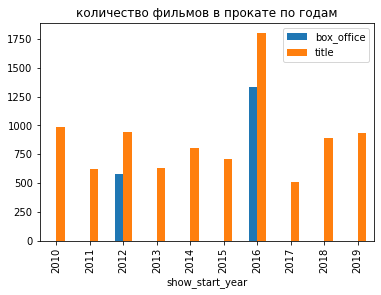

In [99]:
films.plot(title='количество фильмов в прокате по годам', kind='bar', y=['box_office', 'title'])

В 2010 году доля выпущенных фильмов попавших в прокат кинотеатров составляла 10%. Начиная с 2013 года фиксируется увеличение количества фильмов, попадающих в кинотеатры с повышением конверсии до 70%.

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

Посмотрим основные показатели доходов фильмов кинотеатарах за каждый год:

In [100]:

revenue = data.groupby('show_start_year')['box_office'].agg(['sum','count', 'mean', 'median'])
revenue

,sum,count,mean,median
show_start_year,,,,
2010,0.000000e+00,0,NaN,NaN
2011,0.000000e+00,0,NaN,NaN
2012,2.513974e+10,579,4.341924e+07,131572.00
2013,0.000000e+00,0,NaN,NaN
2014,0.000000e+00,0,NaN,NaN
2015,0.000000e+00,0,NaN,NaN
2016,1.090680e+11,1330,8.200600e+07,3638898.75
2017,0.000000e+00,0,NaN,NaN
2018,0.000000e+00,0,NaN,NaN


<AxesSubplot:title={'center':'сборы фильмов в прокате по годам'}, xlabel='show_start_year'>

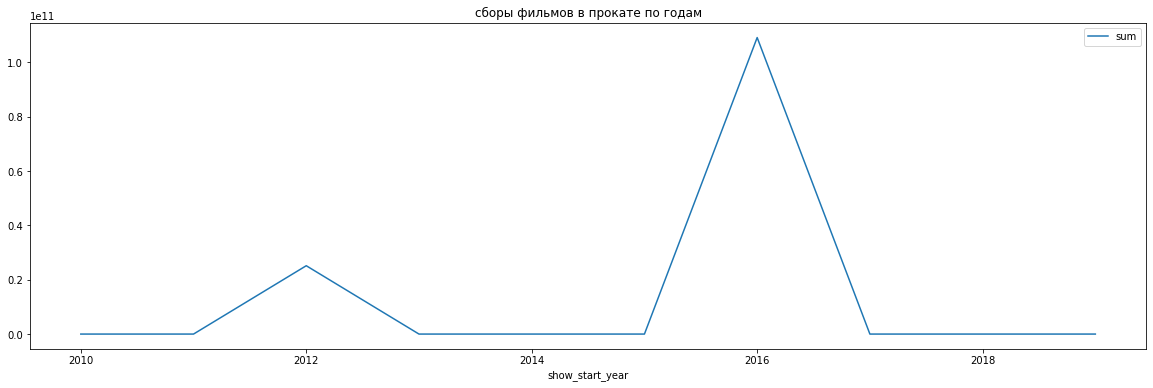

In [101]:
revenue.plot(title='сборы фильмов в прокате по годам', kind='line', y='sum', figsize=(20,6))

In [102]:
data.groupby('show_start_year')[ 'box_office'].sum().sort_values(ascending=False)

show_start_year
2016    1.090680e+11
2012    2.513974e+10
2010    0.000000e+00
2011    0.000000e+00
2013    0.000000e+00
2014    0.000000e+00
2015    0.000000e+00
2017    0.000000e+00
2018    0.000000e+00
2019    0.000000e+00
Name: box_office, dtype: float64

Наименьшая сумма сборов была в 2010 году, всего 2,4 млн. рублей, наибольшая в 2018 г и составила 49 млрд. рублей. Собры сильно увеличиваются с 2014 года, при этом росло и количество фильмов, показываемых в кинотеатрах.

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

In [103]:
data.pivot_table(index = 'show_start_year', values = ['box_office', 'title'], aggfunc = ['mean', 'median'])


,mean,median
,box_office,box_office
show_start_year,,
2012,4.341924e+07,131572.00
2016,8.200600e+07,3638898.75


<AxesSubplot:title={'center':'Средняя и медианная сумма сборов по годам'}, xlabel='show_start_year'>

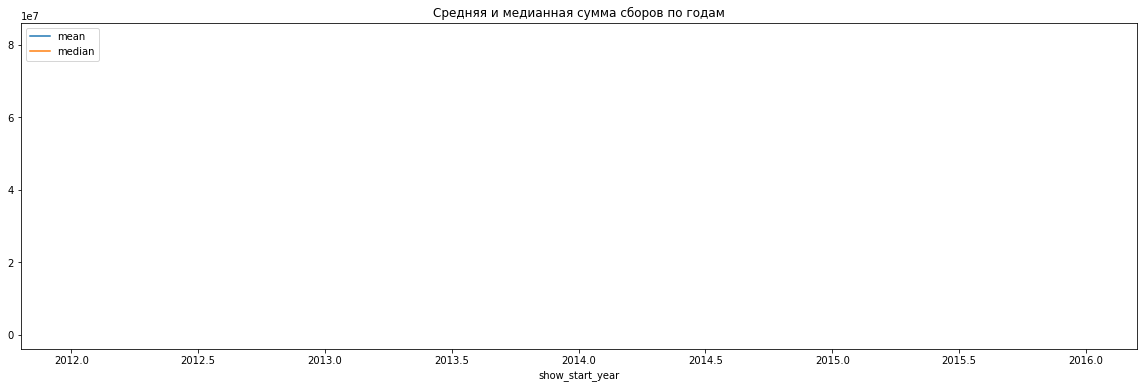

In [104]:
revenue.plot(title='Средняя и медианная сумма сборов по годам', kind='line', y= ['mean', 'median'], figsize=(20,6))


Видно, что средние показатели сборов увеличились, при этом медианные показатели выросли незначительно. Это говорит о том, что появляются фильмы, способные собирать большую кассу в кинотеатрах, но их количество небольшое.

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

In [105]:
rest = data.query('show_start_year >= 2015').groupby('age_restriction')['box_office'].sum()
rest

age_restriction
«0+» - для любой зрительской аудитории    3.994994e+09
«12+» - для детей старше 12 лет           1.432923e+10
«16+» - для детей старше 16 лет           3.975850e+10
«18+» - запрещено для детей               3.540492e+10
«6+» - для детей старше 6 лет             1.558033e+10
Name: box_office, dtype: float64

<AxesSubplot:title={'center':'Сборы с учетом ограничений'}, xlabel='age_restriction'>

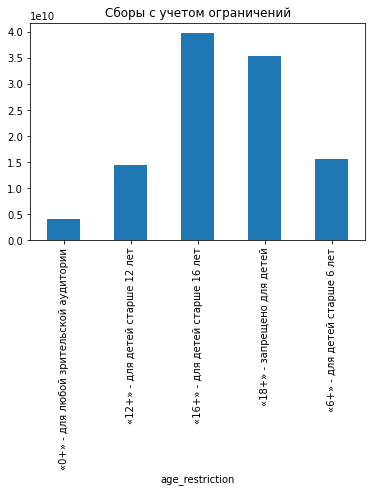

In [106]:
rest.plot(title='Сборы с учетом ограничений', kind='bar', y='box_office', x = 'show_start_year')

In [107]:
rest1 = data.query('show_start_year >= 2015').groupby(['age_restriction', 'show_start_year'])['box_office'].sum()
rest1

age_restriction                         show_start_year
«0+» - для любой зрительской аудитории  2015               0.000000e+00
                                        2016               3.994994e+09
                                        2017               0.000000e+00
                                        2018               0.000000e+00
                                        2019               0.000000e+00
«12+» - для детей старше 12 лет         2015               0.000000e+00
                                        2016               1.432923e+10
                                        2017               0.000000e+00
                                        2018               0.000000e+00
                                        2019               0.000000e+00
«16+» - для детей старше 16 лет         2015               0.000000e+00
                                        2016               3.975850e+10
                                        2017               0.000000e+00
        

In [108]:
t = data.query('2015 <= show_start_year').groupby(['show_start_year', 'age_restriction'])['box_office'].agg('sum').reset_index()

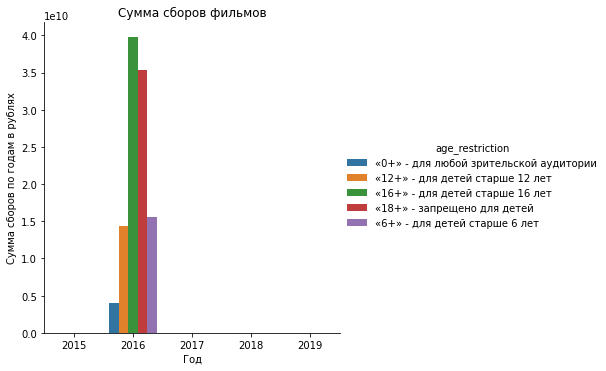

In [109]:
fg = sn.catplot(x='show_start_year', y='box_office', hue='age_restriction', data=t, kind='bar');
plt.title('Сумма сборов фильмов');
plt.xlabel('Год');
plt.ylabel('Сумма сборов по годам в рублях');

Основную прибыль приносят фильмы с рейтингом 16+. Фильмы для детей от 12 и от 6 лет приносят примерно одинаково. Фильмы для самых маленьких приносят небольшую прибыль, так как их небольшое количество и аудитория соответственно тоже небольшая.

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

Выведем датасет с фильмами, снятыми с госсподдержкой.

In [110]:
support = data.query('total_support > 0')
support


,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,budget,financing_source,ratings,genres,box_office,show_start_year,main_director,main_genres,total_support,help_to_budget
1746,Пока еще жива,111005313,2013-10-11,художественный,"ано содействия развитию кинематографии ""ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.0,...,79411900.0,Министерство культуры,8.1,"драма,мелодрама",NaN,2013,А.Атанесян,драма,26500000.0,0.333703
1916,Бесславные придурки,111003314,2014-03-28,художественный,"ооо ""компания ""атк-студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.0,...,37142857.0,Министерство культуры,NaN,неизвестно,NaN,2014,А.Якимчук,неизвестно,26000000.0,0.700000
1966,Невидимки,111004213,2013-09-10,художественный,"ооо ""компания ""реал-дакота""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.0,...,176023490.0,Фонд кино,5.3,"комедия,фантастика",NaN,2013,Р.Давлетьяров,комедия,107847945.0,0.612691
1995,БЕРЦЫ,111004314,2014-05-05,художественный,"ооо ""студия ""пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.0,...,40574140.0,Министерство культуры,4.2,драма,NaN,2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,28000000.0,0.690095
2265,Братья Ч,111004414,2014-04-23,художественный,"ооо ""студия ""пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.0,...,40015122.0,Министерство культуры,6.4,драма,NaN,2014,М.Угаров,драма,25000000.0,0.624764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8791,Союз спасения,111022019,2019-12-26,художественный,"зао ""дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,100000000.0,...,980000000.0,Фонд кино,6.0,"история,биография,драма",NaN,2019,А.Кравчук,история,500000000.0,0.510204
8793,Иван Царевич и Серый Волк 4,114005019,2019-12-20,анимационный,"ооо ""студия анимационного кино ""мельница""",Россия,"Д.Шмидт, К.Феоктистов","С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,100000000.0,...,190000000.0,Фонд кино,6.7,"мультфильм,приключения,семейный",NaN,2019,Д.Шмидт,мультфильм,100000000.0,0.526316
8801,Вторжение,111022519,2019-12-23,художественный,"ооо ""арт пикчерс студия"", ооо ""водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,100000000.0,...,944000000.0,Фонд кино,5.7,"фантастика,боевик",NaN,2019,Ф.Бондарчук,фантастика,500000000.0,0.529661
8803,Я свободен,111023019,2019-12-26,художественный,"ао ""тпо ""киностудия им. м.горького""",Россия,И.Северов,С.Зернов,«12+» - для детей старше 12 лет,0.0,...,46154000.0,Министерство культуры,5.9,драма,NaN,2019,И.Северов,драма,30000000.0,0.649998


In [111]:
support['total_support'].describe()

count    4.070000e+02
mean     6.086557e+07
std      7.120944e+07
min      3.000000e+06
25%      2.534500e+07
50%      3.500000e+07
75%      6.000000e+07
max      5.000000e+08
Name: total_support, dtype: float64

В среднем на фильмы с господдержкой тратится 60 млн.рублей.

In [112]:
support['total_support'].sum()

24772285794.0

За время проведения исследования с 2012 по 2017 годы на фильмы из бюджета было потрачено более 20 млрд. рублей.

In [113]:
t= support.groupby('show_start_year')['total_support'].sum()
t

show_start_year
2013    1.343479e+08
2014    5.720023e+08
2015    3.656241e+09
2016    8.874753e+09
2017    3.183972e+09
2018    3.446969e+09
2019    4.904000e+09
Name: total_support, dtype: float64

<AxesSubplot:title={'center':'Гос поддержка средства'}, xlabel='show_start_year'>

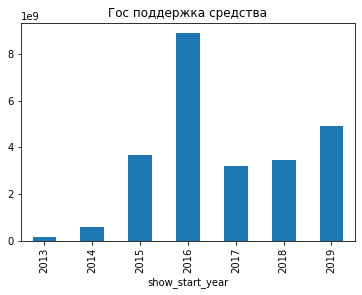

In [114]:
t.plot(title='Гос поддержка средства', kind='bar', y='total_support', x = 'show_start_year')

Прослеживается тренд на увеличение госфинансирования фильмов.

In [115]:
t1= support.groupby('show_start_year')['total_support'].count()
t1

show_start_year
2013      2
2014     16
2015     86
2016    136
2017     41
2018     56
2019     70
Name: total_support, dtype: int64

<AxesSubplot:title={'center':'Фильмы при гос поддержке'}, xlabel='show_start_year'>

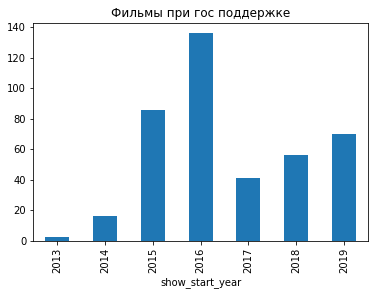

In [116]:
t1.plot(title='Фильмы при гос поддержке', kind='bar', y='total_support', x = 'show_start_year')

С 2015 года отмечается краное увеличение госфинансирования фильмов. После спада в 2017 году выделяется устойчивый тренд на повышение количества фильмов с госфинансированием.

Посмотрим, для каких возрастных категорий снимают фильмы с гос.поддержкой:

<AxesSubplot:ylabel='age_restriction'>

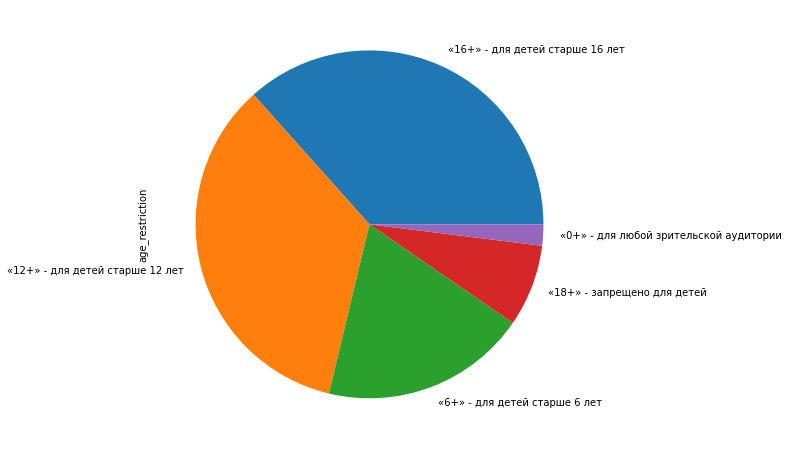

In [117]:

display(support['age_restriction'].value_counts().plot(y='count', kind='pie', figsize=(8, 8)))

В основном господдержка направлена на продукты для молодежи. Возможно это связано с попыткой навязать политические и социальные установки на подрастающее поколение.

Проведем оценку окупаемости фильмов. Для этого создадим новый столбец с прибылью, как разность с заработанных средств и бюджета фильма.

In [118]:
pd.options.mode.chained_assignment = None
support['profit'] = support['box_office'] - support['budget']

In [119]:
support

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,financing_source,ratings,genres,box_office,show_start_year,main_director,main_genres,total_support,help_to_budget,profit
1746,Пока еще жива,111005313,2013-10-11,художественный,"ано содействия развитию кинематографии ""ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.0,...,Министерство культуры,8.1,"драма,мелодрама",NaN,2013,А.Атанесян,драма,26500000.0,0.333703,NaN
1916,Бесславные придурки,111003314,2014-03-28,художественный,"ооо ""компания ""атк-студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.0,...,Министерство культуры,NaN,неизвестно,NaN,2014,А.Якимчук,неизвестно,26000000.0,0.700000,NaN
1966,Невидимки,111004213,2013-09-10,художественный,"ооо ""компания ""реал-дакота""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.0,...,Фонд кино,5.3,"комедия,фантастика",NaN,2013,Р.Давлетьяров,комедия,107847945.0,0.612691,NaN
1995,БЕРЦЫ,111004314,2014-05-05,художественный,"ооо ""студия ""пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.0,...,Министерство культуры,4.2,драма,NaN,2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,28000000.0,0.690095,NaN
2265,Братья Ч,111004414,2014-04-23,художественный,"ооо ""студия ""пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.0,...,Министерство культуры,6.4,драма,NaN,2014,М.Угаров,драма,25000000.0,0.624764,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8791,Союз спасения,111022019,2019-12-26,художественный,"зао ""дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,100000000.0,...,Фонд кино,6.0,"история,биография,драма",NaN,2019,А.Кравчук,история,500000000.0,0.510204,NaN
8793,Иван Царевич и Серый Волк 4,114005019,2019-12-20,анимационный,"ооо ""студия анимационного кино ""мельница""",Россия,"Д.Шмидт, К.Феоктистов","С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,100000000.0,...,Фонд кино,6.7,"мультфильм,приключения,семейный",NaN,2019,Д.Шмидт,мультфильм,100000000.0,0.526316,NaN
8801,Вторжение,111022519,2019-12-23,художественный,"ооо ""арт пикчерс студия"", ооо ""водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,100000000.0,...,Фонд кино,5.7,"фантастика,боевик",NaN,2019,Ф.Бондарчук,фантастика,500000000.0,0.529661,NaN
8803,Я свободен,111023019,2019-12-26,художественный,"ао ""тпо ""киностудия им. м.горького""",Россия,И.Северов,С.Зернов,«12+» - для детей старше 12 лет,0.0,...,Министерство культуры,5.9,драма,NaN,2019,И.Северов,драма,30000000.0,0.649998,NaN


Создадим новый датасет из неокупившихся фильмов и проведем их оценку

In [120]:
support1 = support.query('profit < 0')
support1

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,financing_source,ratings,genres,box_office,show_start_year,main_director,main_genres,total_support,help_to_budget,profit
3355,Врач (2015),111005816,2016-03-28,художественный,"ооо ""артлайт""",Россия,Г.Куценко (Ю.Куценко),А.Новиков,«16+» - для детей старше 16 лет,0.0,...,Министерство культуры,6.2,драма,223251.00,2016,Г.Куценко (Ю.Куценко),драма,25000000.0,0.641026,-38776749.00
3356,Врач (2015),111005816,2016-03-28,художественный,"ооо ""артлайт""",Россия,Г.Куценко (Ю.Куценко),А.Новиков,«16+» - для детей старше 16 лет,0.0,...,Министерство культуры,6.2,драма,84720.00,2016,Г.Куценко (Ю.Куценко),драма,25000000.0,0.641026,-38915280.00
3357,Врач (2015),111005816,2016-03-28,художественный,"ооо ""артлайт""",Россия,Г.Куценко (Ю.Куценко),А.Новиков,«16+» - для детей старше 16 лет,0.0,...,Министерство культуры,6.2,драма,456626.50,2016,Г.Куценко (Ю.Куценко),драма,25000000.0,0.641026,-38543373.50
3425,КЛАД (2015),111004816,2016-03-01,художественный,"ооо ""каргофильм""",Россия,И.Волкова,А.Готлиб,«6+» - для детей старше 6 лет,0.0,...,Министерство культуры,5.1,"приключения,семейный",4960.00,2016,И.Волкова,приключения,35000000.0,0.671467,-52119678.00
3426,КЛАД (2015),111004816,2016-03-01,художественный,"ооо ""каргофильм""",Россия,И.Волкова,А.Готлиб,«6+» - для детей старше 6 лет,0.0,...,Министерство культуры,5.1,"приключения,семейный",650.00,2016,И.Волкова,приключения,35000000.0,0.671467,-52123988.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5071,Хороший Мальчик,111009816,2016-06-07,художественный,"ооо ""2д целлулоид"", ооо ""арт пикчерс студия""",Россия,О.Карас,"В.Соловьев, Ю.Храпов, А.Пескова, Д.Рудовский, ...",«12+» - для детей старше 12 лет,0.0,...,Министерство культуры,6.6,комедия,0.00,2016,О.Карас,комедия,35000000.0,0.648148,-54000000.00
5074,Хороший Мальчик,111009816,2016-06-07,художественный,"ооо ""2д целлулоид"", ооо ""арт пикчерс студия""",Россия,О.Карас,"В.Соловьев, Ю.Храпов, А.Пескова, Д.Рудовский, ...",«12+» - для детей старше 12 лет,0.0,...,Министерство культуры,6.6,комедия,7093374.30,2016,О.Карас,комедия,35000000.0,0.648148,-46906625.70
5108,Эластико,111016416,2016-10-18,художественный,"ооо ""пятый элемент"", ооо ""реновацио интертейнм...",Россия,М.Расходников,"Г.Малков, В.Поляков, Е.замалиев, А.Кузьминов, ...",«12+» - для детей старше 12 лет,0.0,...,Фонд кино,6.3,"спорт,мелодрама,криминал",2055.00,2016,М.Расходников,спорт,15000000.0,0.500000,-29997945.00
5109,Эластико,111016416,2016-10-18,художественный,"ооо ""пятый элемент"", ооо ""реновацио интертейнм...",Россия,М.Расходников,"Г.Малков, В.Поляков, Е.замалиев, А.Кузьминов, ...",«12+» - для детей старше 12 лет,0.0,...,Фонд кино,6.3,"спорт,мелодрама,криминал",14936676.30,2016,М.Расходников,спорт,15000000.0,0.500000,-15063323.70


In [121]:
support1['profit'].sum()

-8502820613.049999

In [122]:
support1['profit'].count()

92

In [123]:
ratio = support1['profit'].count() / support['total_support'].count()
ratio

0.22604422604422605

Убыток от неокупившихся фильмов с господдержкой составли более 20 млрд. рублей. Не окупается более 70% фильмов с госсподдержкой.

Проведем оценку рейтингов неокупившихся фильмов.

In [124]:
support1.groupby('show_start_year')['ratings'].agg(['max', 'min', 'mean', 'median'])

,max,min,mean,median
show_start_year,,,,
2016,8.5,1.0,5.511765,5.7


<AxesSubplot:xlabel='show_start_year'>

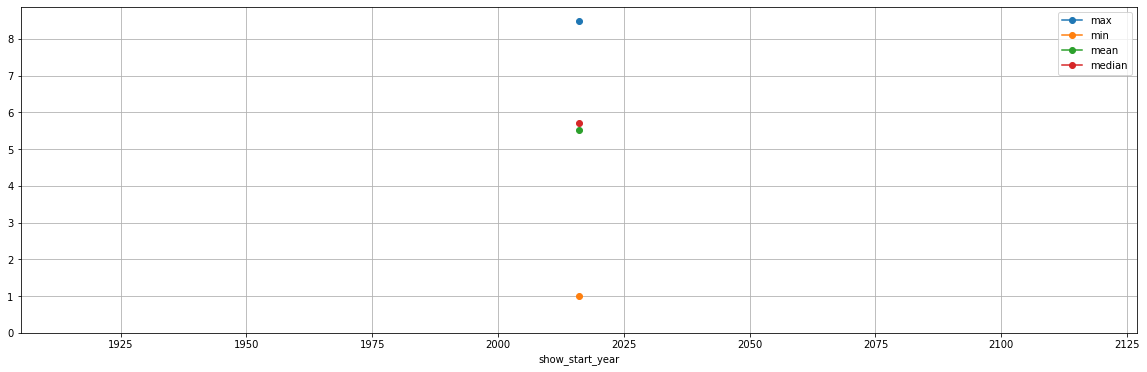

In [125]:
support1.groupby('show_start_year')['ratings'].agg(['max', 'min', 'mean', 'median']).plot(grid=True, ylim=0, style='o-', figsize=(20,6))

В принципе фильмы, снимаемые с господдержкой, имеют неплохое качество. Средняя оценка порядка 6 баллов говорит о том, что в большинстве эти фильмы смотрибельны, хоть и не претендуют на шедевры кинематографа.

Определим распределение по жанрам между фильмами с госсподдержкой

<AxesSubplot:title={'center':'количество фильмов, получивших господдержку (по жанрам)'}>

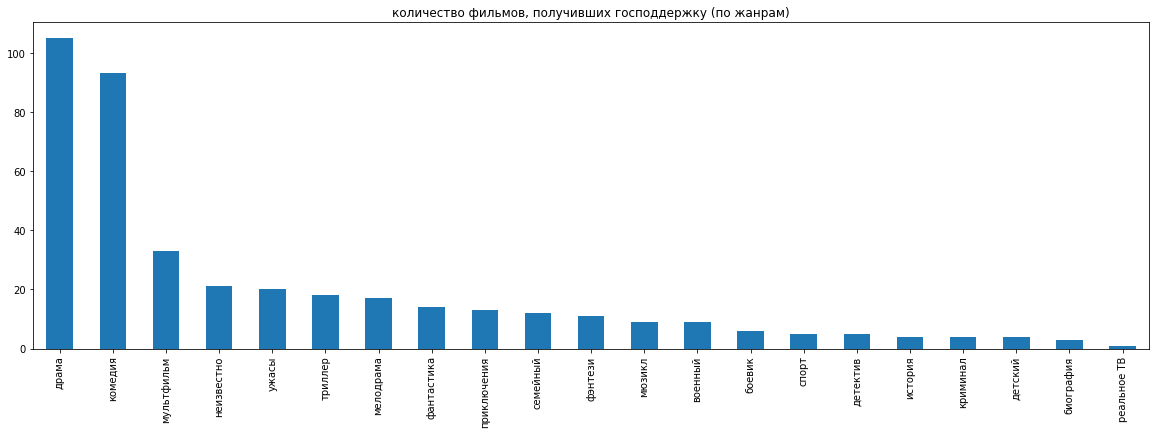

In [126]:
support['main_genres'].value_counts().plot(title='количество фильмов, получивших господдержку (по жанрам)', kind='bar', figsize=(20,6))

Для сравнения определим распределение по жанрам между всеми фильмами.

<AxesSubplot:title={'center':'Общее количество фильмов (по жанрам)'}>

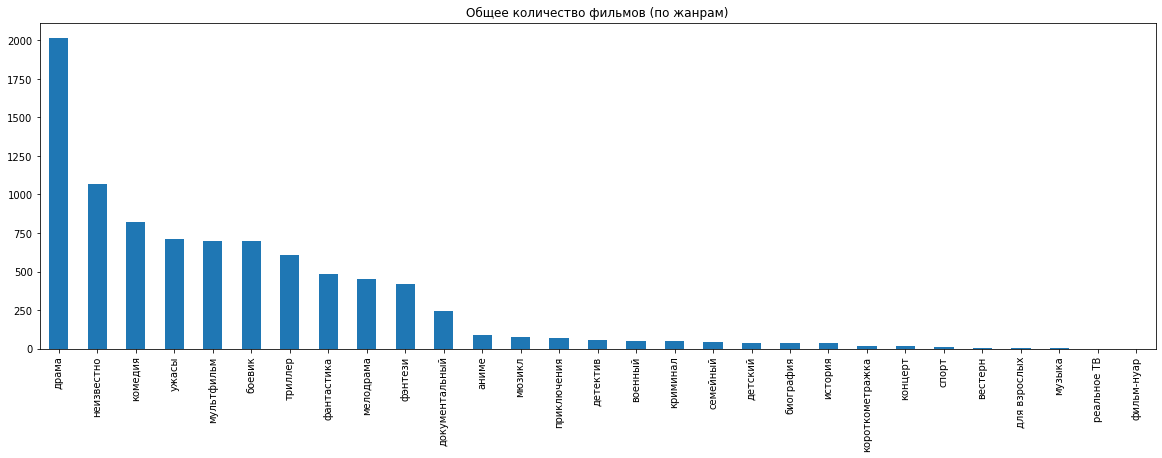

In [127]:
data['main_genres'].value_counts().plot(title='Общее количество фильмов (по жанрам)', kind='bar', figsize=(20,6))

Драмы и комедии являются наиболее популярными жанрами. Господдержкой пользуется большая часть мультфильмов. В общем же на третьем месте по количеству находятся боевики, госсподдержка производства которых невелика.

Проведем оценку рентабельности фильмов по жанрам.

<AxesSubplot:title={'center':'средняя рентабельность фильма (по жанрам)'}, xlabel='main_genres'>

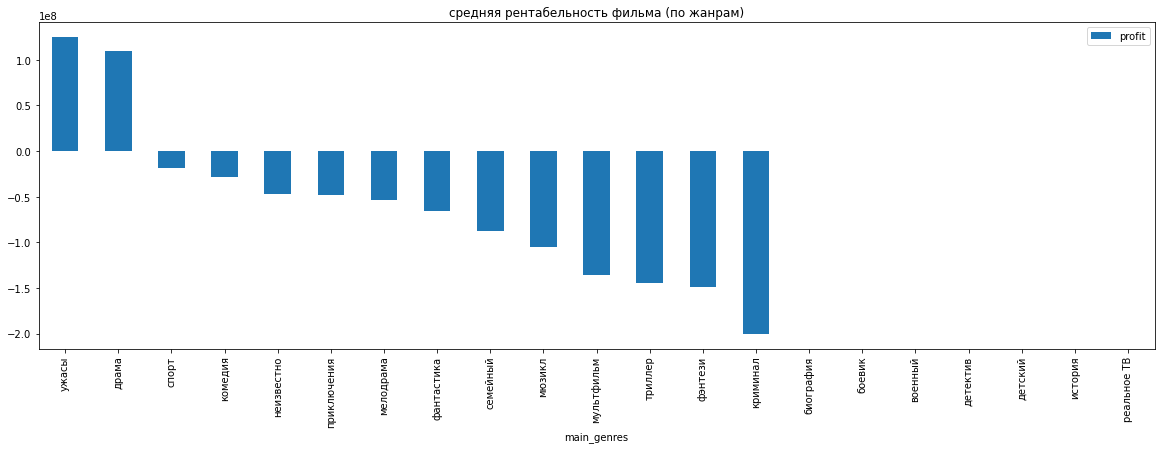

In [128]:
support.groupby('main_genres').agg('mean').sort_values(by='profit', ascending=False).plot(title='средняя рентабельность фильма (по жанрам)',
                  kind='bar',
                  stacked=True,
                  y='profit', figsize=(20,6))

Отличную окупаемость для фильмов с госсподдержкой показывают спортивные фильмы. Сразу приходит на ум успех фильмов "Легенда №17", "Движение вверх", "Лед" и т.д.

Проверим лидеров среди режиссеров по госсподдержке и посмотрим лидеров по оценкам.

In [129]:
support.pivot_table(index= 'main_director', values = ['total_support']).sort_values(by='total_support',ascending=False).head(10)

,total_support
main_director,
Ф.Бондарчук,500000000.0
А.Кравчук,500000000.0
А.Мизгирев,450000000.0
Н.Лебедев,442104482.0
А.Мегердичев,400000000.0
И.Шурховецкий,350000000.0
А.Учитель,300000000.0
О.Степченко,270000000.0
Д.Козловский,260000000.0


In [130]:
support1.query('ratings>8').groupby(['main_director', 'type'])['ratings'].count().sort_values(ascending=False).head(10)

main_director  type          
В.Тодоровский  художественный    2
Name: ratings, dtype: int64

In [131]:
data.query('ratings>8').groupby(['main_director', 'type'])['ratings'].count().sort_values(ascending=False).head(10)

main_director    type          
Питер Джексон    художественный    9
Кристофер Нолан  художественный    8
Дэвид Йетс       художественный    6
Л.Гайдай         художественный    6
Д.Киселев        художественный    6
Джон Краули      художественный    6
Шейн Блэк        художественный    6
Гай Ричи         художественный    6
Ю.Озеров         художественный    6
Пит Доктер       анимационный      5
Name: ratings, dtype: int64

Лидеры среди господдержки, такие как Бондарчук, при это не попадают в топы по рейтингу картин. Только два режиссера, пользующихся господдержкой, сняли фильмы с высоким рейтингом. В абсолютном топе известные американские режиссеры и мэтры Советской школы.

Выведем страны, где были сняты фильмы, которые получили максимальные оценки зрителей:

In [132]:
data.query('ratings>8').groupby('production_country')['ratings'].count().sort_values(ascending=False).head(10)

production_country
США                               74
Россия                            62
СССР                              33
США,Великобритания                26
Великобритания                    17
Франция                            7
Великобритания,США                 6
Япония                             6
Ирландия,Великобритания,Канада     6
США,Германия                       6
Name: ratings, dtype: int64

Анализ показывает, что в общем Российский кинематограф конкурентноспособен. Количество фильмов с высокой оценкой с учетом СССР соответствует США и значительно превосходит остальные страны. Но здесь также надо учитывать, что рейтинг взят с русскоязысного сайта. Для справедливой оценки необходимо сравнить рейтинги с иностранными сайтами, например IMDB.

### Шаг 5. Напишите общий вывод

Цель выполненной работы заключалась в изучении рынка российского кинопроката и выявлении складывающихся в нем тенденций. Для анализа были использованы данные о прокатных удостоверениях, сборах и государственной поддержке фильмов, опубликованные на портале Министерства культуры, а также информацию с сайта КиноПоиск.
На первом этапе было изучено два файла с данными  и проведено их слияние по общему столбцу с номером прокатного удостоверения картины.
Далее была проведена предобработка данных. Установлен тип времени, с исключением часов и минут, так как эта информация отсутствует. В некоторых ячейках изменен тип данных. Название некоторых столбцов приведено к используемому в Python. Проведена оценка пропусков и выполнено заполнение пропущенных значений для столбцов, где это необходимо. Например, судя по названию фильма и режиссеру пропуски в стане-производителе заполнены соответствующей страной. Пропуски в столбцах режиссер, продюсер, жанр заменены на неизвестно. Изучены дубликаты в данных. Выявленные дубликаты в номерах прокатных удостоверений заменены на  новые неиспользованные номера. Из столбцов с категориальными значениями удалены пробелы в начале и конце строки, слова приведены к нижнему регистру.
Исходя из первноначального анализа данных было определено, что есть фильмы с нулевым бюджетом, но при этом имеется поддержка из фондов. Для таких фильмов приравняли бюджет к сумме поддержки. Также установлено, что у 539 фильмов сборы меньше, чем 10000 рублей. Эти данные требуют дополнительного анализа, так как связаны либо с ошибкой в данных о сборах, либо фильмы совсем не окупились.
В датасете созданы дополнительные столбцы с указанием года выхода фильма, имени основного режиссера и основной страны-производителя. Была посчитана доля господдержки при создании фильмов. В среднем доля государственной поддержки в кинематографе составляет более 50% затраченных средств. В абсолютных величинах эта цифра порядка 35 млн. рублей. Определено, что господдержка характерна для фильмов Российского производства.
Установлено, что в 2010 году доля выпущенных фильмов попавших в прокат кинотеатров составляла 10%. Начиная с 2013 года фиксируется увеличение количества фильмов, попадающих в кинотеатры с повышением конверсии до 70%.
Наименьшая сумма сборов филмами в кинотеатрах была в 2010 году, всего 2,4 млн. рублей, наибольшая в 2018 г и составила 49 млрд. рублей. Собры сильно увеличиваются с 2014 года, при этом росло и количество фильмов, показываемых в кинотеатрах.Определено, что средние показатели сборов фильмов увеличились с 2014 года, при этом медианные показатели выросли незначительно. Это говорит о том, что появляются фильмы, способные собирать большую кассу в кинотеатрах, но их количество небольшое.
Выявлено, что ссновную прибыль приносят фильмы с рейтингом 16+. Фильмы для детей от 12 и от 6 лет приносят примерно одинаково. Фильмы для самых маленьких приносят небольшую прибыль, так как их небольшое количество и аудитория соответственно тоже небольшая, так как с детьми до 6 лет практически не ходят в кинотеатры из-за их особенностей концентрировать внимание.
Установлено, что в среднем на фильмы с господдержкой тратится 60 млн.рублей. За время проведения исследования с 2012 по 2017 годы на фильмы из бюджета было потрачено более 20 млрд. рублей и фиксируется тренд на увеличение этих расходов и на количество спонсируемых фильмов. В основном господдержка направлена на продукты для молодежи. Возможно это связано с попыткой навязать политические и социальные установки на подрастающее поколение. Убыток от неокупившихся фильмов с господдержкой составли более 20 млрд. рублей. Не окупается более 70% фильмов с госсподдержкой. При этом, рейтинг у данных картин порядка 6 баллов из 10, что говорит, что качество фильмов в основном сносное. Драмы и комедии являются наиболее популярными жанрами. Господдержкой пользуется большая часть мультфильмов. В общем же на третьем месте по количеству находятся боевики, госсподдержка производства которых невелика.
Отличную окупаемость для фильмов с госсподдержкой показывают спортивные фильмы. Сразу приходит на ум успех фильмов "Легенда №17", "Движение вверх", "Лед" и т.д.
Лидером по господдержке среди режиссеров является Бондарчук, при этом его картины не попадают в топы по рейтингу. Только два режиссера, пользующихся господдержкой, сняли фильмы с высоким рейтингом. В абсолютном топе среди режиссеров известные американские режиссеры и мэтры Советской школы.
Анализ рейтинга фильмов показал, что в общем Российский кинематограф конкурентноспособен. Количество фильмов с высокой оценкой с учетом СССР соответствует США и значительно превосходит остальные страны. Но здесь также надо учитывать, что рейтинг взят с русскоязысного сайта. Для справедливой оценки необходимо сравнить рейтинги с иностранными сайтами, например IMDB.